### 주식분석
- 대한항공 주식분석
- 20년간 데이터 분석하여 최적의 매수 매매 타이밍 분석

시계열 데이터

In [7]:
import cx_Oracle
import numpy as np
import pandas as pd

# 그래픽 위해
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
# DB연결
uid = 'PROJECT1'
upw = 'Test1234'
url = 'localhost:1521/orcl'
conn = cx_Oracle.connect(uid,upw,url)
cursor=conn.cursor()

In [5]:
# 시게열 데이터
sql="select * from STOCKNAV where SDATE>20190101 order by sdate asc" # 20190101 부터 시간 순서대로 쭉
cursor.execute(sql)
res=cursor.fetchall()
len(res)

401

In [59]:
# CloseP(종가) 기준으로 판단하겠다
idx=["no", "Date", "OpenP", "HighP", "LowP", "CloseP", "vol", "stat"]
df = pd.DataFrame(res, columns=idx)
ndf = df.loc[0:70,["CloseP"]]
ndf

,CloseP
0,32400
1,31800
2,32350
3,33500
4,33900
...,...
66,32950
67,33100
68,35600
69,37750


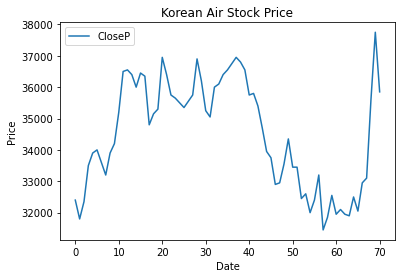

In [60]:
ndf.plot()

plt.title("Korean Air Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [76]:
#5일평균선
cp=df.loc[:,["CloseP"]]
mov5=[0,0,0,0] # 첫 4일은 평균을 모르니까
sum=0
i=0
avg=0;
npCp=np.array(cp.values)

npCp[:5]
np.average(npCp[:5])

32790.0

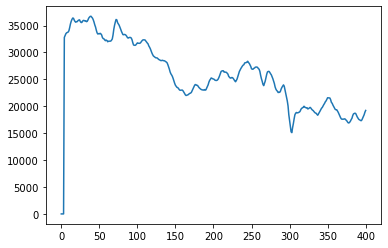

In [84]:
#5일평균선
ans=[0,0,0,0]
for i in range(len(cp)-4):
    avg = np.average(npCp[i:i+5])
    ans.append(avg)
ans
plt.plot(ans)

In [88]:
df['mov5'] = pd.Series(ans)
df

,no,Date,OpenP,HighP,LowP,CloseP,vol,stat,mov5
0,425,20190102,32950,32950,32050,32400,349580,0,0.0
1,424,20190103,32700,32950,31650,31800,464995,0,0.0
2,423,20190104,31650,32450,31300,32350,424001,0,0.0
3,422,20190107,32600,33500,32300,33500,619120,0,0.0
4,421,20190108,33550,34050,32900,33900,515749,0,32790.0
...,...,...,...,...,...,...,...,...,...
396,29,20200807,20500,20950,18850,19100,15844472,0,17790.0
397,28,20200810,19000,19100,18350,18750,3821098,0,18110.0
398,27,20200811,19350,19550,18850,18900,3632851,0,18420.0
399,26,20200812,19250,20100,19050,19550,8913015,0,18880.0


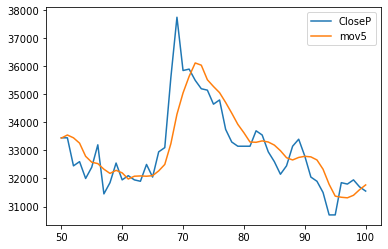

In [92]:
ndf = df.loc[50:100,["CloseP","mov5"]]
ndf.plot()

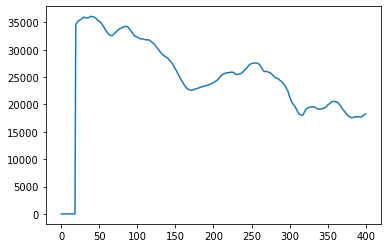

In [94]:
# 20일 이평선
ans=[]
for i in range(19):
    ans.append(0)
    
for i in range(len(cp)-19):
    avg = np.average(npCp[i:i+20])
    ans.append(avg)
ans
plt.plot(ans)

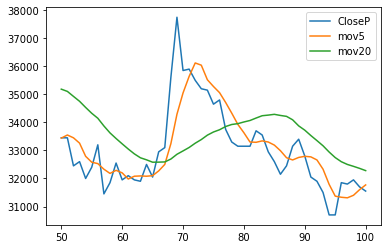

In [97]:
df['mov20'] = pd.Series(ans)
df
ndf=df.loc[50:100,["CloseP","mov5","mov20"]]
ndf.plot()

In [121]:
# 1000만원 수익률 분석하기
mv5=df['mov5']
mv20=df['mov20']
buysell=[]
bfStat=0
ans=[]
#초기화
for i in range(20):
    ans.append(0)
    
inStock=0 # 보유 주식 수
for i in range(20,len(mv5)):
    if(mv5[i]>mv20[i]):
        nowStat=1;
    else:
        nowStat=-1
    
    if(bfStat==-1):#단이평선이 아래
        if(nowStat==1):
            #print("매수")
            inStock=1
            ans.append(1)
        else:
            #print("대기")
            ans.append(0)
    else:# 단이평선이 위에 있음
        if(nowStat==1):
            #print("대기")
            ans.append(0)
        else:
            if(inStock>0):
                inStock=0
                #print("매도")
                ans.append(-1)
            else: # 주식이 없어서 못 팜
                #print("대기")
                ans.append(0)
    bfStat=nowStat 
    # 일이 마무리되면 현재상태가 과거상태로변환
        
ans[:100]    
df['timing']=pd.Series(ans)
df['price']=df['timing']*df['CloseP']
df['profit']=df['price'].cumsum()
df.tail()

,no,Date,OpenP,HighP,LowP,CloseP,vol,stat,mov5,mov20,timing,price,profit
396,29,20200807,20500,20950,18850,19100,15844472,0,17790.0,17900.0,0,0,10100
397,28,20200810,19000,19100,18350,18750,3821098,0,18110.0,17995.0,1,18750,28850
398,27,20200811,19350,19550,18850,18900,3632851,0,18420.0,18090.0,0,0,28850
399,26,20200812,19250,20100,19050,19550,8913015,0,18880.0,18192.5,0,0,28850
400,25,20200813,19850,20100,19700,19800,2047935,0,19220.0,18272.5,0,0,28850


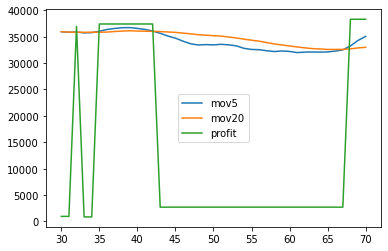

In [123]:
ndf=df.loc[30:70,['mov5','mov20','profit']]
ndf.plot()